# Finding Key Connectors

In [1]:
# list of users with id and name

users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" }
]

# (0,1) indicates Hero and Dunn are friends

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [2]:
# list of friends for each user

for user in users:
    user['friends'] = []

In [3]:
users

[{'friends': [], 'id': 0, 'name': 'Hero'},
 {'friends': [], 'id': 1, 'name': 'Dunn'},
 {'friends': [], 'id': 2, 'name': 'Sue'},
 {'friends': [], 'id': 3, 'name': 'Chi'},
 {'friends': [], 'id': 4, 'name': 'Thor'},
 {'friends': [], 'id': 5, 'name': 'Clive'},
 {'friends': [], 'id': 6, 'name': 'Hicks'},
 {'friends': [], 'id': 7, 'name': 'Devin'},
 {'friends': [], 'id': 8, 'name': 'Kate'},
 {'friends': [], 'id': 9, 'name': 'Klein'}]

In [4]:
for i, j in friendships:
    users[i]['friends'].append(users[j])
    users[j]['friends'].append(users[i])

In [5]:
# each user dict now containts a list of friends

print users[0]['name']
print len(users[0]['friends'])
print users[0]['friends'][0]['name']
print users[0]['friends'][1]['name']

Hero
2
Dunn
Sue


In [6]:
def number_of_friends(user):
    '''how many friends does this user have?'''
    return len(user['friends'])

In [7]:
total_connections = sum(number_of_friends(user) for user in users)
print [number_of_friends(user) for user in users]
print total_connections

[2, 3, 3, 3, 2, 3, 2, 2, 3, 1]
24


In [8]:
from __future__ import division
num_users = len(users)
avg_connections = total_connections / num_users
print avg_connections

2.4


In [9]:
# we can sort from "most friends" to "least friends"

num_friends_by_id = [(user['id'], number_of_friends(user)) for user in users]

In [10]:
# unsorted list

num_friends_by_id

[(0, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 2),
 (5, 3),
 (6, 2),
 (7, 2),
 (8, 3),
 (9, 1)]

In [11]:
# degree centrality

sorted(num_friends_by_id, # get this list sorted
      key = lambda(user_id, num_friends): num_friends, # by number of friends
      reverse = True) # largest to smallest

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

# Data Scientists You May Know

In [12]:
# find a user's friends of friends

def friends_of_friend_ids_bad(user):
    return [foaf['id'] # return id
           for friend in user['friends'] # for each of user's friends
           for foaf in friend['friends']] # get each of _their_ friends

In [13]:
# call on Hero

friends_of_friend_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

In [14]:
# count of mutual friends

from collections import Counter

# helper function to exclude person matching with hisself

def not_the_same(user, other_user):
    return user['id'] != other_user['id']

# helper function to exclude people already known
# if other_user is not_the_same as all people in user's friends, these two are not friends

def not_friends(user, other_user):
    return all(not_the_same(friend, other_user) for friend in user['friends'])

def friends_of_friend_ids(user):
    return Counter(foaf['id']
                  for friend in user['friends'] # for each of my friends
                  for foaf in friend['friends'] # count their friends
                  if not_the_same(user, foaf) # who aren't me
                  and not_friends(user, foaf)) # and aren't my friends

In [15]:
# Chi (user no. 3) is connected to Hero in two ways and to Clive in one way

print friends_of_friend_ids(users[3])

Counter({0: 2, 5: 1})


In [16]:
# counter takes a list and spits out a frequency table as a dict

u = users[5]
print [foaf['id'] for friend in u['friends'] for foaf in friend['friends'] if not_the_same(u, foaf) and not_friends(u, foaf)]
print friends_of_friend_ids(users[5])

[3, 8, 8]
Counter({8: 2, 3: 1})


In [17]:
for u in users:
    print u['name'] + ' ' + str(friends_of_friend_ids(u))

Hero Counter({3: 2})
Dunn Counter({4: 1})
Sue Counter({4: 1})
Chi Counter({0: 2, 5: 1})
Thor Counter({1: 1, 2: 1, 6: 1, 7: 1})
Clive Counter({8: 2, 3: 1})
Hicks Counter({7: 2, 9: 1, 4: 1})
Devin Counter({6: 2, 9: 1, 4: 1})
Kate Counter({5: 2})
Klein Counter({6: 1, 7: 1})


In [18]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [19]:
# function that finds users with a certain interest

def data_scientists_who_like(target_interest):
    return [user_id
           for user_id, user_interest in interests
           if user_interest == target_interest]

In [20]:
print data_scientists_who_like('statistics')

[3, 6]


In [21]:
# instead of searching whole list, build index from interests to users

from collections import defaultdict

user_ids_by_interest = defaultdict(list)
interests_by_user_id = defaultdict(list)

In [22]:
print user_ids_by_interest
print interests_by_user_id

defaultdict(<type 'list'>, {})
defaultdict(<type 'list'>, {})


In [23]:
# keys are interests, values are list of user_ids with that interest

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

# keys are user_ids, values are list of interests for that user_id

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [24]:
user_ids_by_interest

defaultdict(<type 'list'>, {'Java': [0, 5, 9], 'neural networks': [7, 8], 'NoSQL': [1], 'Hadoop': [0, 9], 'Mahout': [7], 'Storm': [0], 'regression': [3, 4], 'statistics': [3, 6], 'probability': [3, 6], 'programming languages': [5], 'Python': [2, 3, 5], 'deep learning': [8], 'Haskell': [5], 'mathematics': [6], 'Spark': [0], 'numpy': [2], 'pandas': [2], 'artificial intelligence': [8], 'theory': [6], 'libsvm': [4], 'C++': [5], 'R': [3, 5], 'HBase': [0, 1], 'Postgres': [1], 'decision trees': [4], 'Big Data': [0, 8, 9], 'MongoDB': [1], 'scikit-learn': [2, 7], 'MapReduce': [9], 'machine learning': [4, 7], 'scipy': [2], 'statsmodels': [2], 'Cassandra': [0, 1]})

In [25]:
interests_by_user_id

defaultdict(<type 'list'>, {0: ['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra'], 1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'], 2: ['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas'], 3: ['R', 'Python', 'statistics', 'regression', 'probability'], 4: ['machine learning', 'regression', 'decision trees', 'libsvm'], 5: ['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages'], 6: ['statistics', 'probability', 'mathematics', 'theory'], 7: ['machine learning', 'scikit-learn', 'Mahout', 'neural networks'], 8: ['neural networks', 'deep learning', 'Big Data', 'artificial intelligence'], 9: ['Hadoop', 'Java', 'MapReduce', 'Big Data']})

In [26]:
# iterate over each user's interest

# for each interest, iterate over the other users with that interest

# keep count of how many times we see each other user

def most_common_interests_with(user):
    return Counter(interested_user_id 
                   for interests in interests_by_user_id[user['id']]
                   for interested_user_id in user_ids_by_interest[interest]
                  if interested_user_id != user['id'])

In [27]:
for u in users:
    print u['name'] + ' ' + str(most_common_interests_with(u))

Hero Counter({8: 7, 9: 7})
Dunn Counter({0: 5, 8: 5, 9: 5})
Sue Counter({0: 6, 8: 6, 9: 6})
Chi Counter({0: 5, 8: 5, 9: 5})
Thor Counter({0: 4, 8: 4, 9: 4})
Clive Counter({0: 6, 8: 6, 9: 6})
Hicks Counter({0: 4, 8: 4, 9: 4})
Devin Counter({0: 4, 8: 4, 9: 4})
Kate Counter({0: 4, 9: 4})
Klein Counter({0: 4, 8: 4})


# Salaries and Experience

In [28]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1), 
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

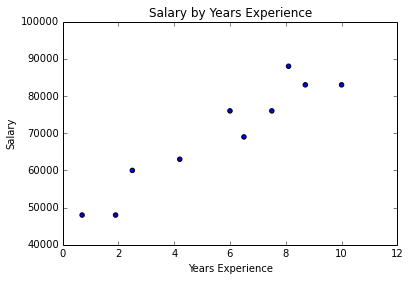

In [30]:
tenures = [tenure for salary, tenure in salaries_and_tenures]
salaries = [salary for salary, tenure in salaries_and_tenures]
plt.scatter(tenures, salaries)
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.title("Salary by Years Experience")
plt.show()

In [31]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"

In [32]:
# keys are tenure buckets, values are lists of salaries for that bucket

salary_by_tenure_bucket = defaultdict(list)

for sal, ten in salaries_and_tenures:
    salary_by_tenure_bucket[tenure_bucket(ten)].append(sal)

In [33]:
salary_by_tenure_bucket

defaultdict(<type 'list'>, {'more than five': [83000, 88000, 76000, 69000, 76000, 83000], 'between two and five': [60000, 63000], 'less than two': [48000, 48000]})

In [34]:
# compute average for each bucket

average_salary_by_bucket = {
    tenure_bucket: sum(salaries) / len(salaries) for tenure_bucket, salaries in salary_by_tenure_bucket.iteritems()
}

In [35]:
average_salary_by_bucket

{'between two and five': 61500.0,
 'less than two': 48000.0,
 'more than five': 79166.66666666667}